# Conceitos envolvidos

# 📌 Conceitos Matemáticos para Implementação do GerOndApp

## 📌 1. Séries Temporais e Funções Periódicas

- **Funções para plotar**


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
###### FUNÇÃO PARA PLOTAR 1 SÉRIE EM GRÁFICO

def plotar(sinal, periodo, nome):
    plt.figure(figsize = (10,3))
    plt.plot(periodo,sinal)
    plt.title(nome)
    plt.xlabel('Tempo(s)')
    plt.ylabel('Amplitude')
    plt.grid()
    plt.show()

#FUNÇÃO PARA PLOTAR N SÉRIES COM SUAS RESPECTIVAS LEGENDAS EM UM SÓ GRÁFICO

def plotar_sinais(vetorTempo, *sinais, labels = None, titulo):

    plt.figure(figsize=(10,5))

    #Cria legendas aleatórias caso nenhuma for informada
    if labels is None:
        labels = [f"Sinal {i+1}" for i in range(len(sinais))] 

    #Plota cada sinal com sua respectiva legenda
    for i, sinal in enumerate(sinais):
        plt.plot(vetorTempo, sinal, label = labels[i])

    #Configura restante das infos
    plt.legend()
    plt.xlabel("Tempo (s)")
    plt.ylabel("Amplitude")
    plt.title(titulo)
    plt.grid()
    plt.show()


#FUNÇÃO PARA PLOTAR SÉRIES EM SEUS GRÁFICOS DE UMA SÓ VEZ

def subplotar(sinal, t, nome, qtd_sinais, posicao):
    plt.figure(figsize = (10,5))
    plt.subplot (qtd_sinais, 1, posicao)
    plt.plot(t, sinal, label = nome)
    plt.title(nome)
    plt.grid()


#FUNÇÃO PARA PLOTAR 4 SINAIS 2x2

def plotar_2x2(sinal1, sinal2, sinal3, sinal4, t, labels=None):
    # Cria legendas caso nenhuma for informada
    if labels is None:
        labels = [f"Sinal {i+1}" for i in range(4)]  # Corrigido para 4 sinais

    # Criar os subplots (2 linhas, 2 colunas)
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))

    # Adicionar os sinais aos subplots
    axs[0, 0].plot(t, sinal1, label=labels[0], color = 'blue')
    axs[0, 0].set_title(labels[0])

    axs[0, 1].plot(t, sinal2, label=labels[1], color = 'yellow')
    axs[0, 1].set_title(labels[1])
    
    axs[1, 0].plot(t, sinal3, label=labels[2], color = 'green')
    axs[1, 0].set_title(labels[2])

    axs[1, 1].plot(t, sinal4, label=labels[3], color = 'red')
    axs[1, 1].set_title(labels[3])

    # Melhorar a apresentação dos gráficos
    for ax in axs.flat:
        ax.set_xlabel("Tempo (s)")
        ax.set_ylabel("Amplitude")
        ax.grid(True)

    plt.tight_layout()
    plt.show()


    Iremos criar um vetor de instantes no tempo para podermos criar e visualizar os sinais

In [3]:
vetorTempo = np.linspace(0,1,1000)  #1 vetor de 1000 milisegundos (1 seg / 1000 pontos)

### 🔹 1.1 Funções Periódicas
- **Onda Senoidal**:  

    Onda periódica descrita pela função seno:
  
$x(t) = A \cdot sen(2 \pi f t + \phi)$

Onde  $\phi$  é o deslocamento no eixo x também chamado de fase, **f** é a frequencia e **t** é o instante no tempo.
  

In [4]:
 def onda_senoidal(amplitude, frequencia, t, fase):
    return amplitude * np.sin(2*np.pi*frequencia*t + fase)

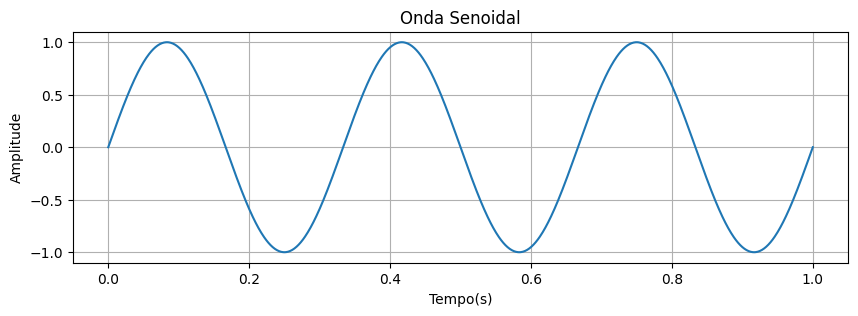

In [5]:
x_senoidal = onda_senoidal(amplitude = 1, frequencia = 3, t = vetorTempo, fase = 0) 

plotar(x_senoidal, vetorTempo, 'Onda Senoidal')

- **Onda Triangular**: Definida por partes (função linear crescente e decrescente).  

    A onda triangular é um tipo de onda periódica que tem um formato em zigue-zague, alternando entre valores máximos e mínimos de forma linear. Ela é chamada assim porque seu formato lembra uma sequência de triângulos.

    Sua forma matemática é: 

$x(t) = \frac{4A}{T} \left( \left( \left( t - \frac{T}{4} \right) \mod T - \frac{T}{2} \right) - \frac{T}{4} \right)$

    Porém, a fim de facilitar, usamos o método sawtooth da biblioteca Scipy.

$x(t) = A \cdot \text{sawtooth}(2\pi f t, 0.5)$

3️⃣ **Características Principais:**

✅ Forma geométrica → Alterna linearmente entre valores máximos e mínimos.

✅ Simetria → Diferente da onda dente de serra, que sobe rapidamente e desce lentamente, a onda triangular sobe e desce na mesma taxa.

✅ Frequência (f) → Determina quantos ciclos ocorrem por segundo.

✅ Amplitude (A) → Define a altura máxima da onda.

✅ Período (𝑇) → Tempo necessário para completar um ciclo.

✅ Harmônicos → Contém apenas harmônicos ímpares, semelhante à onda quadrada, mas com decaimento mais rápido (1/𝑛^2).

In [6]:
#EXEMPLO EM PYTHON

def onda_triangular(amplitude, frequencia, t, simetria):
    return amplitude * sawtooth (2*np.pi*frequencia*t, simetria)

from scipy.signal import sawtooth

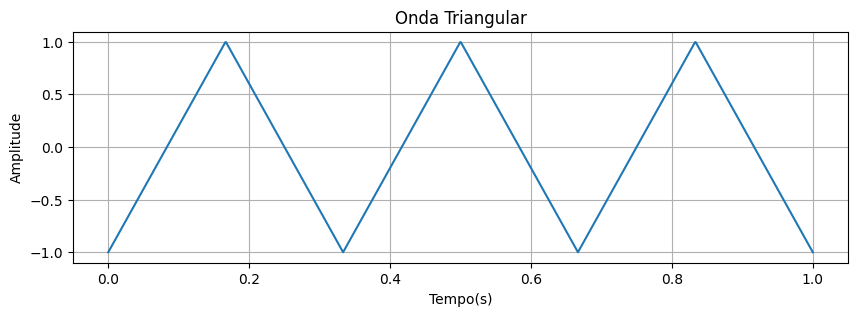

In [25]:
x_triang = onda_triangular(amplitude = 1, frequencia = 3, t = vetorTempo, simetria = 0.5)

plotar(x_triang, vetorTempo, 'Onda Triangular')

- **Onda Quadrada**: Função que alterna entre dois valores, definida por Duty Cycle.

    A onda quadrada é um tipo de onda periódica que alterna entre dois valores fixos, máximo (+𝐴) e mínimo (−A), em intervalos de tempo regulares. Diferente da onda senoidal e triangular, a onda quadrada não tem transições suaves, mudando bruscamente entre os dois níveis.

**Equação Matemática:**
    A onda quadrada pode ser definida como:

$x(t) =\begin{cases} A, & \text{se } 0 \leq t \mod T < D \cdot T \\- A, & \text{se } D \cdot T \leq t \mod T < T\end{cases}$

    Onde D é o Duty Cycle (Proporção de tempo que a onda está no nível máximo.
    Também pode ser representada usando a função square da biblioteca SciPy

$x(t)= A \cdot square(2 \cdot \pi \cdot f \cdot t, duty)$


    Também pode ser representada usando a função square da biblioteca SciPy

$x(t)= A \cdot square(2 \cdot \pi \cdot f \cdot t, duty)$

3️⃣ **Características Principais**

✅ Alternância brusca → A onda quadrada muda entre dois valores sem transições suaves.

✅ Duty Cycle (𝐷) → Indica a porcentagem do tempo que a onda permanece em +𝐴 dentro de um ciclo:𝐷= (Tempo em nível alto /𝑇)×100%

✅ Período (T) → Tempo necessário para completar um ciclo completo:
 
✅ Harmônicos → Contém somente harmônicos ímpares (𝑓,3𝑓,𝑓,...f,3f,5f,...), decaindo proporcionalmente a 1/𝑛.



In [8]:
from scipy.signal import square

def onda_quadrada(amplitude, frequencia, t, duty):
    return amplitude * square(2*np.pi*frequencia*t, duty = duty)

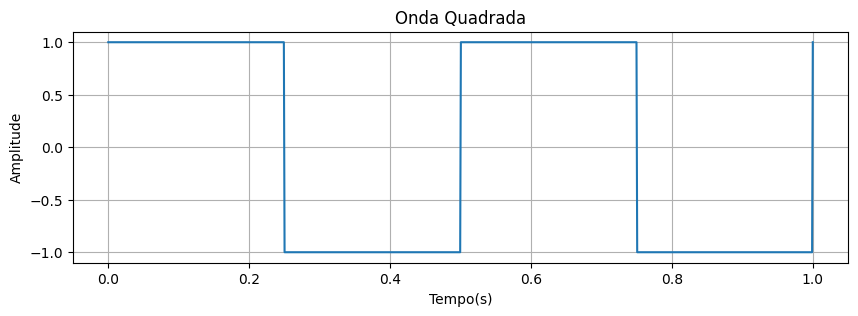

In [9]:
x_quad = onda_quadrada(amplitude = 1, frequencia = 2, t = vetorTempo, duty = 0.5)

plotar(x_quad, vetorTempo, 'Onda Quadrada')

### 🔹 1.2 Ruído Branco
- Sinal aleatório sem periodicidade bem definida.
- Pode ser gerado com distribuição **Gaussiana (normal)** ou **Uniforme**.
- Ruído branco é um tipo de sinal aleatório com uma densidade espectral de potência constante em todas as frequências, ou seja, possui uma distribuição de energia uniforme ao longo do espectro de frequências. Essa característica faz com que o ruído branco seja, de certa forma, "impredizível", com componentes de alta e baixa frequência que ocorrem de forma aleatória.
- Em uma abordagem de sinais, o ruído branco pode ser visto como uma sequência de amostras de uma variável aleatória com distribuição de probabilidade uniforme ou normal, dependendo do tipo de ruído branco que estamos simulando. O "branco" faz referência ao fato de que ele possui uma ampla gama de frequências, muito parecido com a luz branca, que é composta por todas as cores visíveis.


- **Principais características**

  **Estacionaridade:** Em média, as propriedades estatísticas do ruído branco não mudam ao longo do tempo. Isso significa que a média e a variância do sinal permanecem constantes.
      
  **Autocorrelação:** A autocorrelação do ruído branco é uma função delta de Dirac, ou seja, em qualquer ponto do tempo, o sinal não tem correlação com os valores em outros tempos (fora do intervalo infinitesimal).

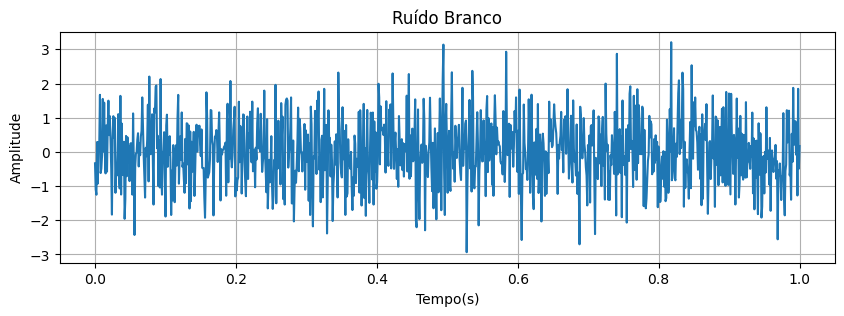

In [10]:
n_amostras = 1000
f_amostra = 1000 #Frequencia da amostra em Hertz

ruidoBranco = np.random.randn(n_amostras)

plotar(ruidoBranco, vetorTempo, 'Ruído Branco')


---

## 📌 2. Operações Matemáticas com Sinais

- **Soma e Subtração de sinais**  


$x(t) = x1 + x2 + ruido\ branco$


<Figure size 1200x1000 with 0 Axes>

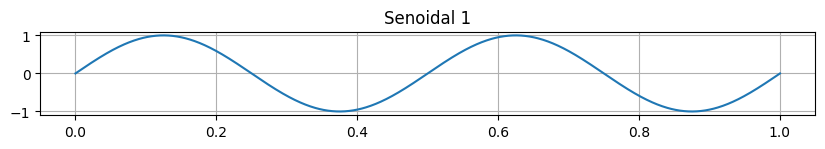

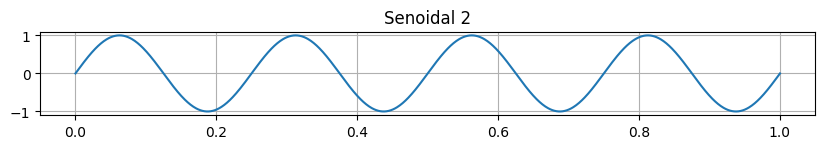

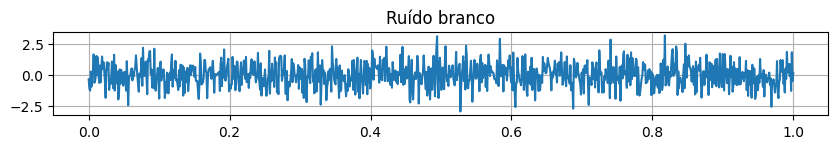

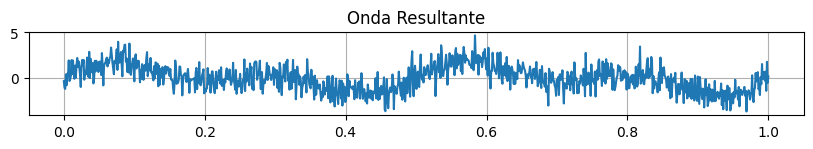

In [11]:
senoide1 = onda_senoidal(amplitude = 1, frequencia = 2, t = vetorTempo, fase = 0)
senoide2 = onda_senoidal(amplitude = 1, frequencia = 4, t = vetorTempo, fase = 0)

onda_res = senoide1 + senoide2 + ruidoBranco

#PLOTANDO

plt.figure(figsize=(12, 10))

subplotar(senoide1, vetorTempo, 'Senoidal 1', 4, 1)
subplotar(senoide2, vetorTempo, 'Senoidal 2', 4, 2)
subplotar(ruidoBranco, vetorTempo, 'Ruído branco', 4, 3)
subplotar(onda_res, vetorTempo, 'Onda Resultante', 4, 4)


-  **Interferência Destrutiva**

   Somando dois sinais de mesma amplitude e frequência, mas de fases opostas, o sinal resultante será o nulo.

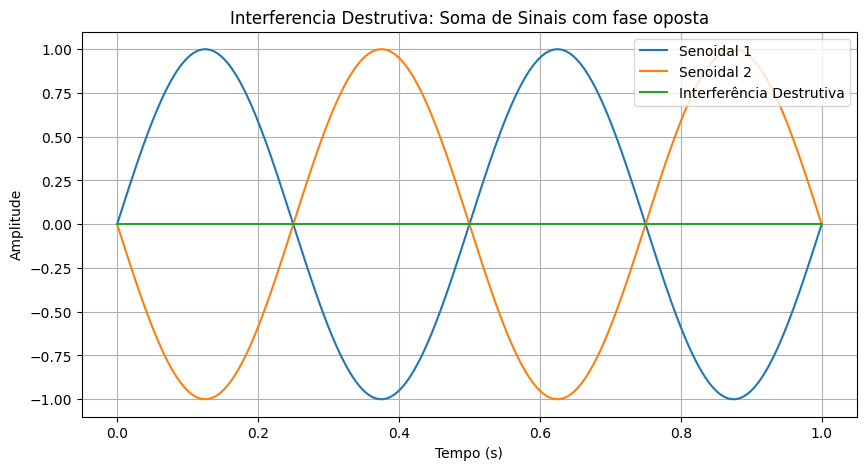

In [12]:
senoidal1 = onda_senoidal(amplitude = 1, frequencia = 2, t = vetorTempo, fase = 0.0)
senoidal2 = onda_senoidal(amplitude = 1, frequencia = 2, t = vetorTempo, fase = np.pi) #Fase Oposta a de cima

interferenciaDestrutiva = senoidal1 + senoidal2

#Plotando

plotar_sinais(vetorTempo, senoidal1, senoidal2, interferenciaDestrutiva, 
              labels = ['Senoidal 1', 'Senoidal 2', 'Interferência Destrutiva'], 
              titulo = 'Interferencia Destrutiva: Soma de Sinais com fase oposta')

## **Multiplicação e Divisão de sinais**
   ### **Multiplicação de ondas senoidais (modulação)**

Ao multiplicarmos duas ondas de frenquencia f1 e f2, temos:

    sinalSaida = A¹. sen(2.pi.f1.t) . A² . sen(2.pi.f2.t)

Agora iremos aplicar a identidade geométrica:

    sen(A)*sen(B) = 1/2 ((cos(A - B) - (cos(A+B))

    sen(f1)*sen(f2) = 1/2 ((cos(f1 - f2) - (cos(f1 + f2))

Surgem então mais 2 novos componentes de frenquência, (f1 - f2) e (f1 + f2)

Essa operação é usada em modulação AM e heteródinos (mudança de frequência em sistemas de rádio).


    

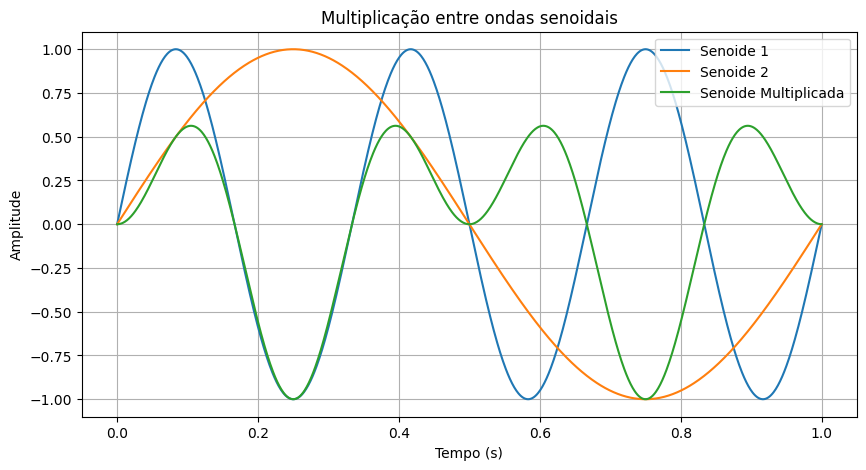

In [13]:
s1 = onda_senoidal(amplitude = 1, frequencia = 3, t = vetorTempo, fase = 0)
s2 = onda_senoidal(amplitude = 1, frequencia = 1, t = vetorTempo, fase = 0)

senoide_multiplicada = s1 * s2


#Plotando

plotar_sinais(vetorTempo, s1, s2, senoide_multiplicada,
             labels = ['Senoide 1', 'Senoide 2', 'Senoide Multiplicada'],
             titulo = 'Multiplicação entre ondas senoidais')

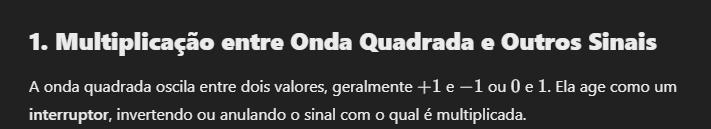

### **Multiplicação de senoidal com quadrada**

    Multiplicar uma onda senoidal por uma onda quadrada alterna a senóide entre seus valores positivos e negativos, resultando em uma forma de onda segmentada. Isso é útil para chaves eletrônicas e sistemas de modulação digital.

- Quando a onda quadrada está positiva (+1), a senoide mantém sua forma original.
- Quando a onda quadrada está negativa (-1), a senoide é invertida (espelhada no eixo horizontal).
- Se a onda quadrada fosse um trem de pulsos (0 e 1), a senoide seria "ligada" e "desligada" em diferentes momentos.

**Aplicações:**

- Modulação AM (Amplitude Modulation)
- Geração de sinais pulsados em eletrônica

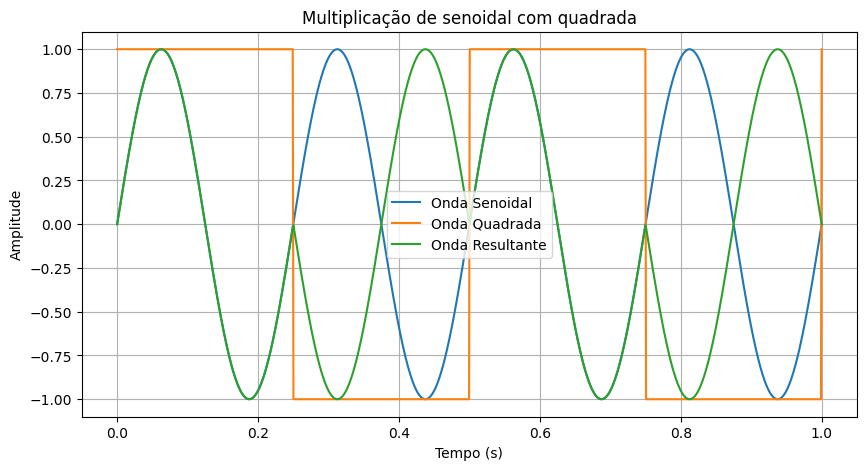

In [14]:
senoide1 = onda_senoidal(amplitude = 1, frequencia = 4, t = vetorTempo, fase = 0)
quadrada1 = onda_quadrada(amplitude = 1, frequencia = 2, t = vetorTempo, duty = 0.5)

onda_resultante = senoide1 * quadrada1

#Plotandob

plotar_sinais(vetorTempo, senoide1, quadrada1, onda_resultante,
             labels = ['Onda Senoidal', 'Onda Quadrada', 'Onda Resultante'],
             titulo = 'Multiplicação de senoidal com quadrada')

### Sinal Quadrado X Sinal Triangular

- A onda triangular será invertida periodicamente, como no caso da senoide.
- Isso gera um sinal serrilhado, útil para sintetizadores de áudio.

**Aplicações:**

- Geração de formas de onda para circuitos osciladores
- Modulação de sinais em áudio digital

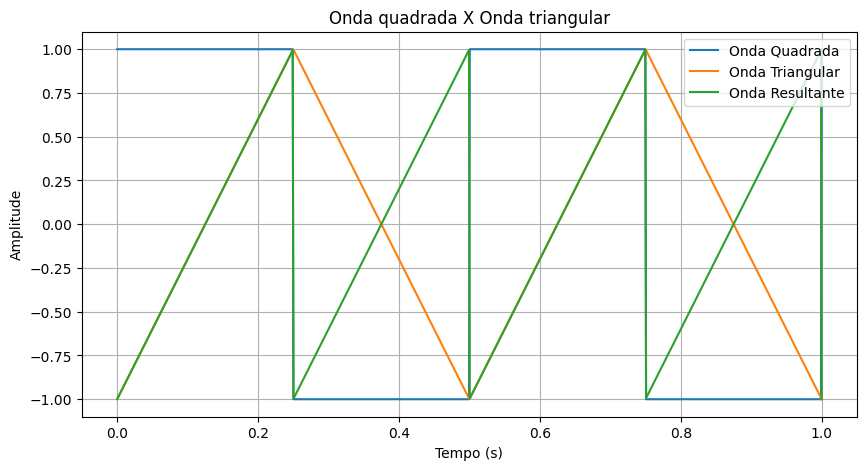

In [15]:
s_quadrado = onda_quadrada(amplitude = 1, frequencia = 2, t = vetorTempo, duty = 0.5)
s_triang = onda_triangular(amplitude = 1, frequencia = 2, t = vetorTempo, simetria = 0.5)

s_result = s_quadrado * s_triang

#Plotando

plotar_sinais(vetorTempo, s_quadrado, s_triang, s_result,
             labels = ['Onda Quadrada','Onda Triangular','Onda Resultante'],
             titulo = 'Onda quadrada X Onda triangular')




### Sinal Quadrado X Ruído Branco

- O ruído branco é um sinal aleatório. Multiplicá-lo por uma onda quadrada resulta em janelas de ruído, onde o ruído aparece e desaparece periodicamente.
- Se a onda quadrada for assimétrica (duty cycle ≠ 50%), o ruído será distribuído irregularmente.

**Aplicações:**

- Síntese de som para criar efeitos como "chopping noise"
- Controle de ruído em telecomunicações

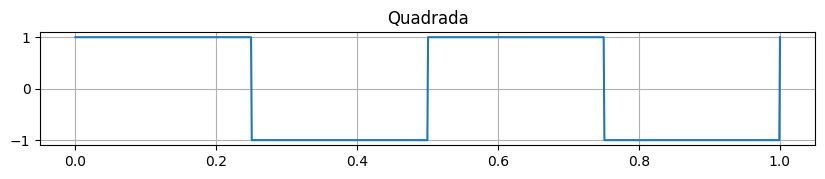

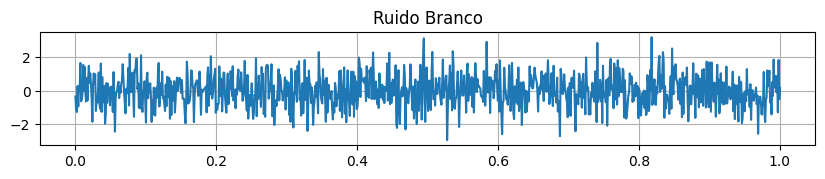

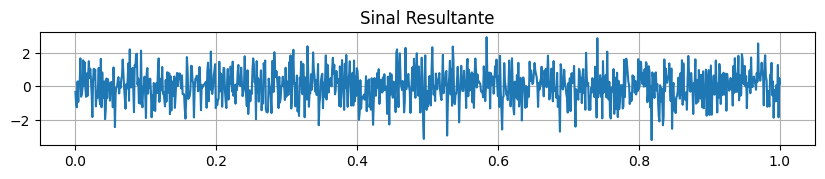

In [16]:
resultado = quadrada1 * ruidoBranco

subplotar(quadrada1, vetorTempo, 'Quadrada', 3, 1)
subplotar(ruidoBranco, vetorTempo, 'Ruido Branco', 3, 2)
subplotar(resultado, vetorTempo, 'Sinal Resultante', 3, 3)

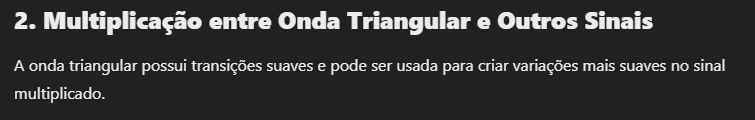

### Onda Triangular X Onda senoidal

- O resultado é uma senoide cuja amplitude cresce e decresce lentamente, criando um efeito de tremulação (tremolo).
- Muito usado em síntese de áudio para criar modulação de amplitude lenta.

**Aplicações:**

- Modulação tremolo em áudio
- Controle gradual de amplitude em telecomunicações

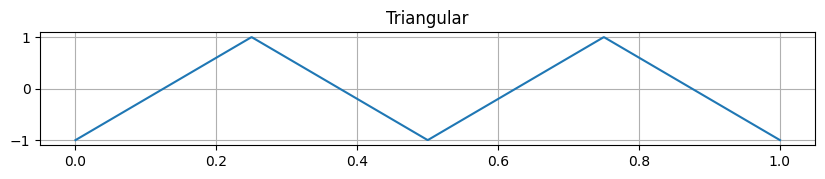

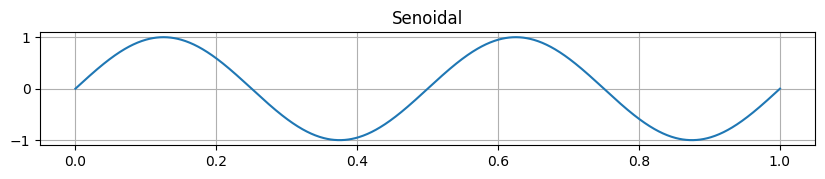

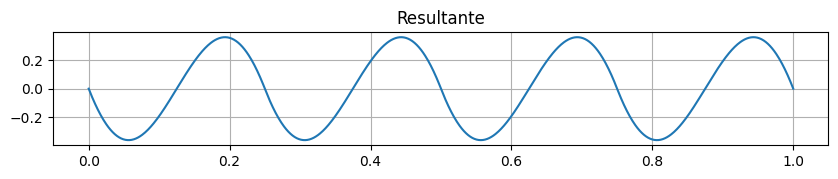

In [17]:
resultado = s_triang * senoidal1

subplotar(s_triang, vetorTempo, 'Triangular', 3, 1)
subplotar(senoidal1, vetorTempo, 'Senoidal', 3, 2)
subplotar(resultado, vetorTempo, 'Resultante', 3, 3)

### Onda Triangular X Ruído Branco

- O ruído branco será suavemente modulado pela onda triangular, criando um efeito de fading (o ruído aumenta e diminui lentamente).
- Ao contrário da onda quadrada, que "liga e desliga" o ruído abruptamente, a onda triangular cria uma transição gradual.

**Aplicações:**

- Síntese de som ambiental e espacialização de áudio
- Modelagem de ruído em comunicações sem fio

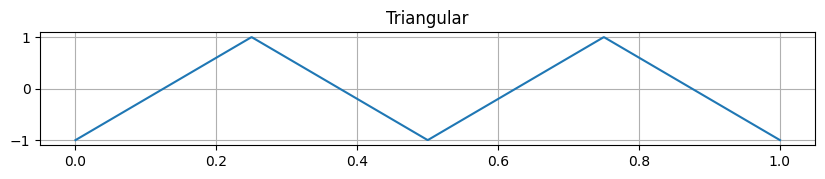

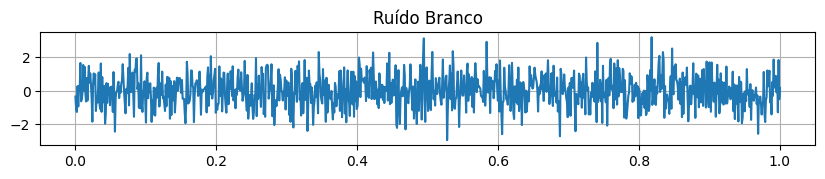

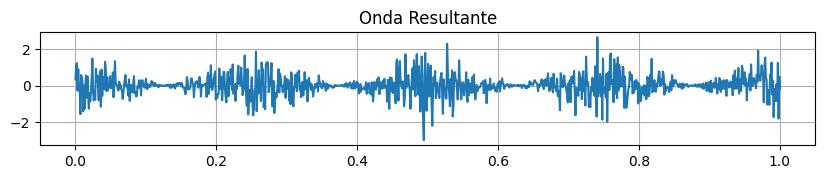

In [18]:
resultado = s_triang * ruidoBranco

subplotar(s_triang, vetorTempo, 'Triangular', 3, 1)
subplotar(ruidoBranco, vetorTempo, 'Ruído Branco', 3, 2)
subplotar(resultado, vetorTempo, 'Onda Resultante', 3, 3)

### Ruído Branco X Outros sinais

- O ruído branco adiciona variações aleatórias aos sinais, útil para criar texturas sonoras e simular perturbações.

## Divisão entre sinais

    A divisão entre sinais pode ser entendida como uma forma de modulação, normalização ou até distorção dos sinais. No entanto, é menos comum que a multiplicação, pois envolve a possibilidade de divisão por zero, exigindo um tratamento especial.

    Vamos explorar as divisões entre ondas quadradas, ondas triangulares e ruído branco e seus efeitos.



### Sinal Quadrado / Sinal senoidal

- Quando a senoide se aproxima de zero, a divisão gera valores extremamente altos.
- O sinal resultante pode ser muito instável, especialmente em pontos onde a senoide cruza o zero.
    Para evitar a divisão por zero iremos acrescentar um número real epsilon para que o denominador não seja zero
  
**Aplicações:**

- Normalização de sinais em alguns filtros digitais.
- Geração de distorção extrema em áudio.


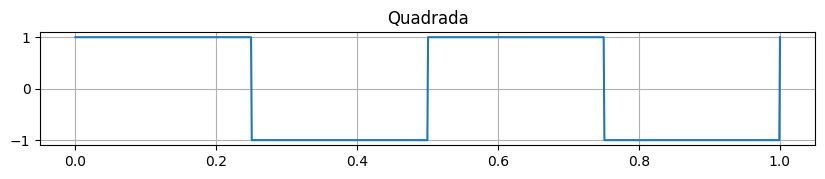

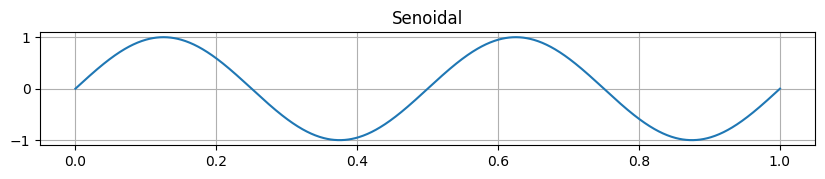

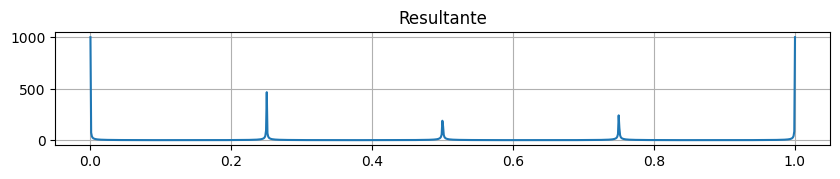

In [19]:
epsilon = 1e-3

resultado = quadrada1 / (senoidal1 + epsilon)

subplotar(quadrada1, vetorTempo, 'Quadrada', 3, 1)
subplotar(senoidal1, vetorTempo, 'Senoidal', 3, 2)
subplotar(resultado, vetorTempo, 'Resultante', 3, 3)

plt.show()

### Sinal Quadrado / Sinal Triangular

- O problema da divisão por zero ainda ocorre quando a onda triangular cruza zero.
- O resultado pode ser um sinal altamente distorcido, com picos abruptos.
  
**Aplicações:**

- Implementação de efeitos de áudio como "crushing" (distorção extrema).
- Modulação de sinais para produzir oscilações caóticas.

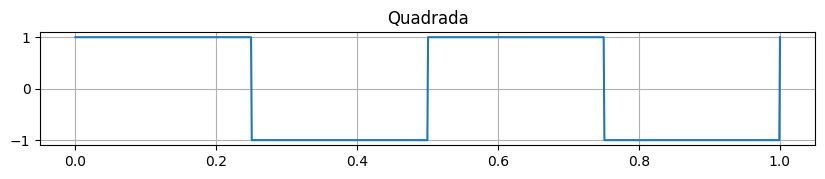

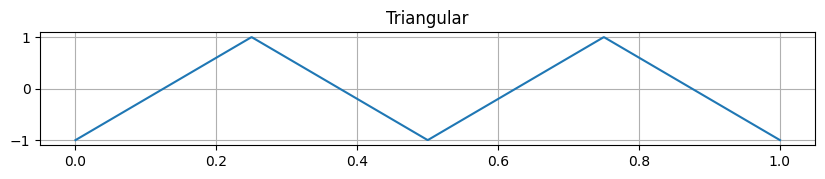

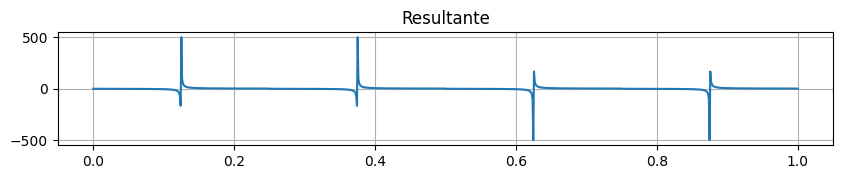

In [20]:
resultado  = quadrada1 / (s_triang + epsilon)

subplotar(quadrada1, vetorTempo, 'Quadrada', 3, 1)
subplotar(s_triang, vetorTempo, 'Triangular', 3, 2)
subplotar(resultado, vetorTempo, 'Resultante', 3,3)


**Conclusão sobre divisão de sinais**

- A divisão entre sinais é menos comum do que a multiplicação, mas pode ser usada para modulação, distorção e efeitos não lineares.
- Onda quadrada ÷ outro sinal pode criar distorções ou padrões de alternância.
- Onda triangular ÷ outro sinal suaviza transições, mas pode gerar picos inesperados.
- Ruído branco ÷ outro sinal amplifica variações aleatórias, criando efeitos caóticos.
- Sempre é necessário tratar divisões por zero para evitar valores infinitos ou explosões no sinal.

### Outros conceitos


- **Offset (Deslocamento vertical do sinal)**
    O offset de um sinal é o deslocamento vertical da onda em relação ao eixo zero (linha base). Em outras palavras, é um valor constante somado a todo o sinal, movendo-o para cima ou para baixo no eixo da amplitude.


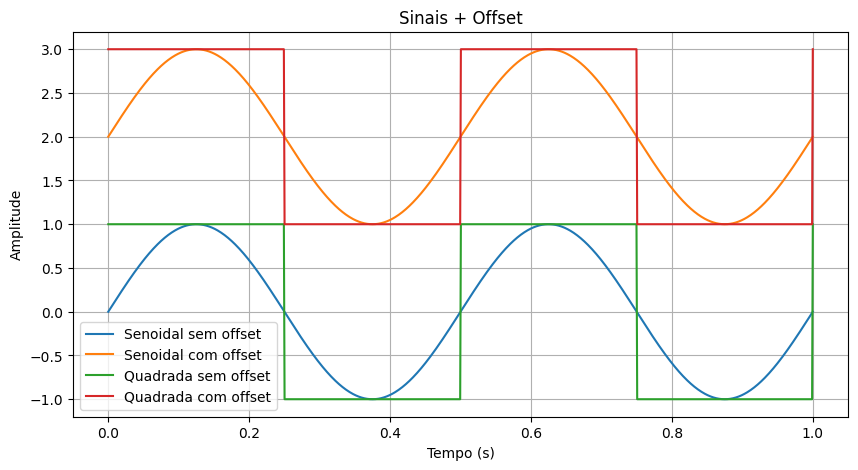

In [21]:
offset = 2

senoidal_offset = senoidal1 + offset
quadrada_offset = quadrada1 + offset

plotar_sinais(vetorTempo, senoidal1, senoidal_offset, quadrada1, quadrada_offset,
             labels = ['Senoidal sem offset','Senoidal com offset','Quadrada sem offset','Quadrada com offset'],
             titulo = 'Sinais + Offset')

**Isso vale para todas os sinais, só o desloca para cima**


- **Duty Cycle (para onda quadrada)**  
  - Razão do tempo em que o sinal permanece em nível alto dentro de um período. Se for 0.3 a onda passará 30% do tempo no valor 1


---

## 📌 3. Transformando sinais do domínio do tempo para o domínio da frequência

    Quando analisamos sinais, podemos estudá-los no domínio do tempo (como variações ao longo do tempo) ou no domínio da frequência (como a composição de diferentes frequências). A Transformada de Fourier e suas variantes permitem fazer essa conversão, revelando informações que não são evidentes apenas observando o sinal no tempo.

    
### 🔹 3.1 Transformada de Fourier
        A Transformada de Fourier (TF) é uma operação matemática que decompõe um sinal no tempo em suas componentes de frequência. Em outras palavras, ela converte um sinal que varia no tempo em uma soma de senos e cossenos de diferentes frequências.

- No domínio do tempo, analisamos como o sinal varia ao longo do tempo.
- No domínio da frequência, analisamos quais frequências compõem esse sinal.
  
        A Transformada de Fourier de um sinal 𝑥(𝑡) contínuo é definida como:

  
$X(f) = \int_{-\infty}^{+\infty} x(t) e^{-j 2\pi f t} dt\$ 


#### 🔹 3.1.1 Transformada Inversa de Fourier

        A Transformada Inversa de Fourier reconstrói o sinal original a partir das frequências constituintes

        A Transformada Inversa de Fourier é definida como:

$x(t) = \int_{-\infty}^{+\infty} X(f) e^{j 2\pi f t} df\$

### 🔹 3.2 Transformada de Fourier Discreta (DFT)
- Utilizada para sinais discretos e computacionais.

        A DFT de um sinal discreto x[n] de tamanho 𝑁 é dada por:

 $X[k] = \sum_{n=0}^{N-1} x[n] e^{-j \frac{2\pi}{N} k n}, \quad k = 0,1,2,\dots,N-1$
  
        A inversa da DFT, usada para reconstruir o sinal original, é dada por:

$x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] e^{j \frac{2\pi}{N} k n}, \quad n = 0,1,2,\dots,N-1$


### 🔹 3.3 Transformada Rápida de Fourier (FFT)
- **A DFT é computacionalmente cara 𝑂($𝑁^2$) (porque envolve somas e multiplicações para cada ponto da sequência) por isso usamos a Transformada Rápida de Fourier (FFT), que reduz a complexidade para O(NlogN).**



- **Por que a FFT acelera o processo?**


      A FFT acelera a DFT ao explorar a recursividade e simetria dos números complexos na exponencial de Fourier. O algoritmo divide o problema original em subproblemas menores, resolvendo-os de maneira recursiva e combinando os resultados de forma eficiente.

        Ela se baseia na Decomposição Cooley-Tukey, que divide um sinal de tamanho 𝑁 em duas partes:

1. Amostras de índices pares
2. Amostras de índices ímpares
   
       Essa divisão reduz os cálculos de forma exponencial, tornando a FFT extremamente eficiente.

- **Divisão Recursiva na FFT**

        Separamos os índices pares dos impares
$X[k] = X_{\text{par}}[k] + e^{-j \frac{2\pi}{N} k} X_{\text{ímpar}}[k]$


- **Pegamos apenas a primeira metade do espectro porque:**

. A segunda metade é redundante para sinais reais.

. Isso reduz o tamanho dos dados e simplifica a análise.

**EXPLICAÇÃO DO DEEPSEEK**

- Explicação detalhada:
  
A FFT retorna um array de valores complexos, onde cada valor corresponde a uma componente de frequência.

Para um sinal de tamanho N, a FFT retorna N valores.

Esses valores estão organizados da seguinte forma:

A primeira metade (0 a N/2−1) corresponde às frequências positivas.

A segunda metade (N/2 a N−1) corresponde às frequências negativas.

Para sinais reais, as frequências negativas são o complexo conjugado das frequências positivas. Portanto, a segunda metade do espectro não traz informações novas.

Exemplo:
Se você tem um sinal de tamanho N=8, a FFT retornará 8 valores. Apenas os primeiros 4 valores (de índice 0 a 3) são úteis para análise, pois os valores de índice 4 a 7 são simétricos.


In [22]:
# Parâmetros do sinal
fs = 1000  # Taxa de amostragem (Hz)
T = 1  # Duração (s)
time = np.linspace(0, T, fs, endpoint=False)  # Vetor de tempo

# Criando um sinal composto por duas senoidais de 50Hz e 120Hz
sinal = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)

# Aplicando a FFT
N = len(sinal)
frequencias = np.fft.fftfreq(N, d=1/fs)  # Eixo de frequência
espectro = np.fft.fft(sinal)  # Aplicação da FFT

# Plotando o sinal original
subplotar(sinal = sinal, t = time, nome = 'Sinal no Domínio do Tempo',qtd_sinais = 2, posicao = 1)


# Plotando o espectro de frequência (magnitude da FFT)

subplotar(np.abs(espectro[:N//2]) * (2/N), frequencias[:N//2], 'Espectro de Frequência (FFT)', 2, 2) #METADE DO ESPECTRO


<class 'NameError'>: name 't' is not defined

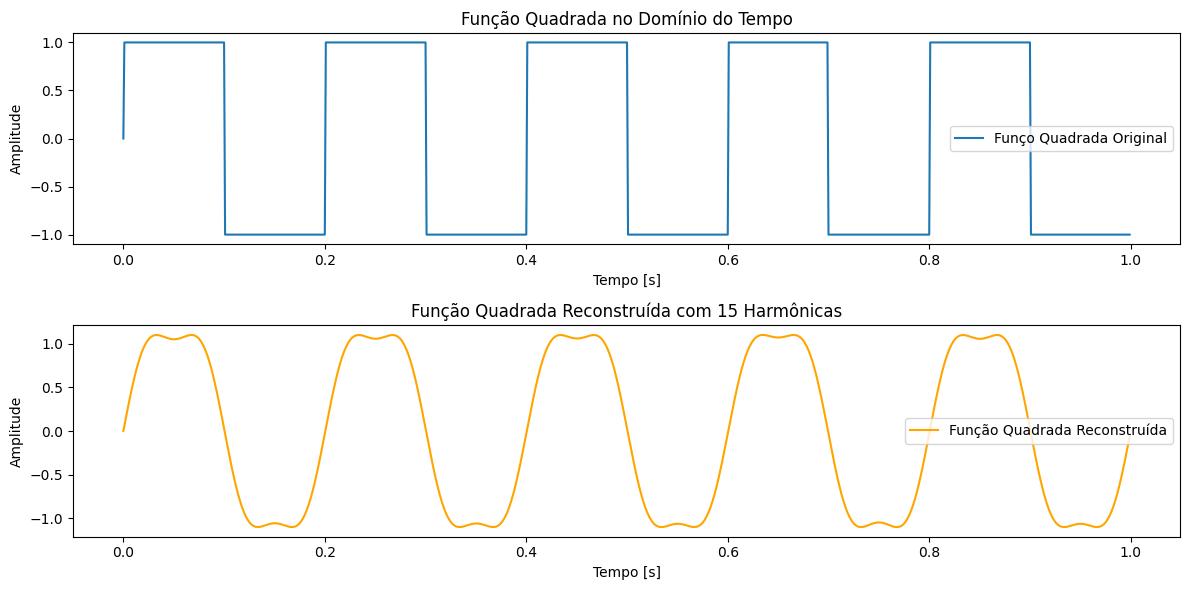

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Configurações
frequencia_amostragem = 1000  # Taxa de amostragem (1 kHz)
T = 1.0 / frequencia_amostragem  # Período de amostragem
t = np.arange(0.0, 1.0, T)  # Vetor de tempo de 0 a 1 segundo

# Criando uma função quadrada
frequencia = 5  # Frequência da função quadrada (5 Hz)
sinal_tempo = np.sign(np.sin(2 * np.pi * frequencia * t))  # Função quadrada

# Calculando a Transformada de Fourier
n = len(sinal_tempo)  # Número de pontos do sinal
fft_resultado = np.fft.fft(sinal_tempo)  # Transformada de Fourier

# Reconstruindo o sinal usando apenas as componentes de frequência
# Pegamos apenas as primeiras 'num_harmonicas' frequências
num_harmonicas =   15 # Número de harmônicas para reconstruir o sinal
fft_reconstruido = np.zeros(n, dtype=complex)
fft_reconstruido[:num_harmonicas] = fft_resultado[:num_harmonicas]
fft_reconstruido[-num_harmonicas:] = fft_resultado[-num_harmonicas:]

# Transformada inversa para reconstruir o sinal no domínio do tempo
sinal_reconstruido = np.fft.ifft(fft_reconstruido).real
# Plotando o sinal original e o sinal reconstruído
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, sinal_tempo, label='Funço Quadrada Original')
plt.title('Função Quadrada no Domínio do Tempo')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, sinal_reconstruido, label='Função Quadrada Reconstruída', color='orange')
plt.title(f'Função Quadrada Reconstruída com {num_harmonicas} Harmônicas')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

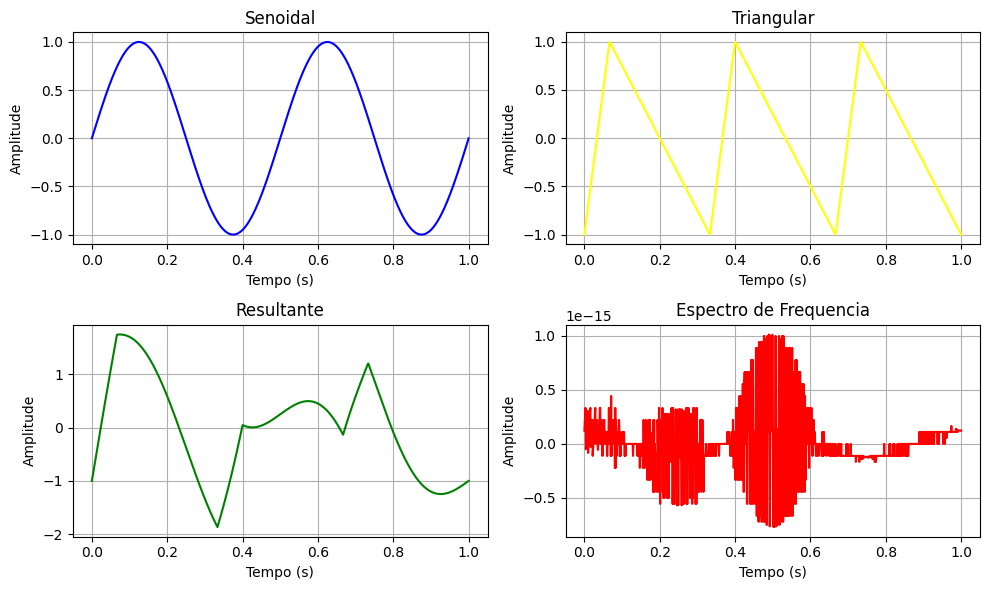

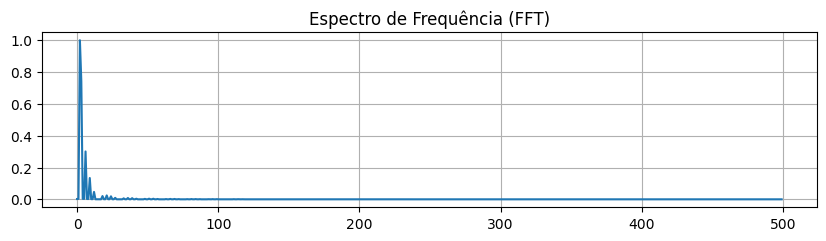

In [24]:
resultante = senoidal1 + x_triang

# Aplicando a FFT
N = len(resultante)
frequencias = np.fft.fftfreq(N, d=1/fs)  # Eixo de frequência
espectro = np.fft.fft(resultante)  # Aplicação da FFT



plotar_2x2(senoidal1, x_triang, resultante, interferenciaDestrutiva, vetorTempo,
          labels = ['Senoidal','Triangular','Resultante','Espectro de Frequencia'])

subplotar(np.abs(espectro[:N//2]) * (2/N), frequencias[:N//2], 'Espectro de Frequência (FFT)', 2, 2) #METADE DO ESPECTRO